In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-stories-of-us-airlines/airline_dec_2008_50k.csv


In [2]:
data = pd.read_csv('/kaggle/input/data-stories-of-us-airlines/airline_dec_2008_50k.csv')

/tmp/ipykernel_33/864623369.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/kaggle/input/data-stories-of-us-airlines/airline_dec_2008_50k.csv')


In [3]:
data.head(10)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,2008,12,1,1,NaN,1000,NaN,1100,WN,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
1,2,2008,12,1,1,NaN,1000,NaN,1110,US,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
2,3,2008,12,1,1,NaN,1000,NaN,1125,MQ,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,12,1,1,NaN,1000,NaN,1227,EV,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
4,5,2008,12,1,1,NaN,1000,NaN,1227,NW,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
5,6,2008,12,1,1,NaN,1005,NaN,1055,MQ,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
6,7,2008,12,1,1,NaN,1015,NaN,1145,MQ,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
7,8,2008,12,1,1,NaN,1020,NaN,1255,MQ,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
8,9,2008,12,1,1,NaN,1029,NaN,1112,YV,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
9,10,2008,12,1,1,NaN,1030,NaN,1201,US,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


In [4]:
data.tail(10)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
49990,49991,2008,12,13,6,804.0,805,932.0,945,WN,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
49991,49992,2008,12,13,6,804.0,805,943.0,910,WN,...,10.0,16.0,0,NaN,0,0.0,0.0,33.0,0.0,0.0
49992,49993,2008,12,13,6,804.0,808,841.0,845,HA,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
49993,49994,2008,12,13,6,805.0,805,914.0,915,WN,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
49994,49995,2008,12,13,6,805.0,805,917.0,910,MQ,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
49995,49996,2008,12,13,6,805.0,810,900.0,904,YV,...,10.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
49996,49997,2008,12,13,6,805.0,810,906.0,916,CO,...,7.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
49997,49998,2008,12,13,6,805.0,810,925.0,940,WN,...,2.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
49998,49999,2008,12,13,6,805.0,810,938.0,945,AA,...,4.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
49999,50000,2008,12,13,6,806.0,800,935.0,935,MQ,...,9.0,15.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         50000 non-null  int64  
 1   Year               50000 non-null  int64  
 2   Month              50000 non-null  int64  
 3   DayofMonth         50000 non-null  int64  
 4   DayOfWeek          50000 non-null  int64  
 5   DepTime            32968 non-null  float64
 6   CRSDepTime         50000 non-null  int64  
 7   ArrTime            31418 non-null  float64
 8   CRSArrTime         50000 non-null  int64  
 9   UniqueCarrier      50000 non-null  object 
 10  FlightNum          50000 non-null  int64  
 11  TailNum            44556 non-null  object 
 12  ActualElapsedTime  31367 non-null  float64
 13  CRSElapsedTime     50000 non-null  int64  
 14  AirTime            31367 non-null  float64
 15  ArrDelay           31367 non-null  float64
 16  DepDelay           329

In [10]:
# Replace NaN Values with 0

data = data.fillna(0)

In [11]:
data

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
0,1,2008,12,1,1,0.0,1000,0.0,1100,WN,...,0.0,0.0,HOU,DAL,239,0.0,0.0,1,A,0
1,2,2008,12,1,1,0.0,1000,0.0,1110,US,...,0.0,0.0,LGA,BOS,185,0.0,0.0,1,A,0
2,3,2008,12,1,1,0.0,1000,0.0,1125,MQ,...,0.0,0.0,SAN,SJC,417,0.0,0.0,1,B,0
3,4,2008,12,1,1,0.0,1000,0.0,1227,EV,...,0.0,0.0,MEM,CVG,403,0.0,0.0,1,C,0
4,5,2008,12,1,1,0.0,1000,0.0,1227,NW,...,0.0,0.0,ORD,DTW,235,0.0,0.0,1,B,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,2008,12,13,6,805.0,810,900.0,904,YV,...,-4.0,-5.0,TUS,PHX,110,10.0,16.0,0,0,0
49996,49997,2008,12,13,6,805.0,810,906.0,916,CO,...,-10.0,-5.0,DFW,IAH,224,7.0,13.0,0,0,0
49997,49998,2008,12,13,6,805.0,810,925.0,940,WN,...,-15.0,-5.0,MDW,OMA,423,2.0,10.0,0,0,0
49998,49999,2008,12,13,6,805.0,810,938.0,945,AA,...,-7.0,-5.0,DFW,STL,551,4.0,14.0,0,0,0


In [13]:
# delete column
del data['Unnamed: 0']

In [14]:
data

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
0,2008,12,1,1,0.0,1000,0.0,1100,WN,16,...,0.0,0.0,HOU,DAL,239,0.0,0.0,1,A,0
1,2008,12,1,1,0.0,1000,0.0,1110,US,2122,...,0.0,0.0,LGA,BOS,185,0.0,0.0,1,A,0
2,2008,12,1,1,0.0,1000,0.0,1125,MQ,3155,...,0.0,0.0,SAN,SJC,417,0.0,0.0,1,B,0
3,2008,12,1,1,0.0,1000,0.0,1227,EV,4980,...,0.0,0.0,MEM,CVG,403,0.0,0.0,1,C,0
4,2008,12,1,1,0.0,1000,0.0,1227,NW,1406,...,0.0,0.0,ORD,DTW,235,0.0,0.0,1,B,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2008,12,13,6,805.0,810,900.0,904,YV,2891,...,-4.0,-5.0,TUS,PHX,110,10.0,16.0,0,0,0
49996,2008,12,13,6,805.0,810,906.0,916,CO,414,...,-10.0,-5.0,DFW,IAH,224,7.0,13.0,0,0,0
49997,2008,12,13,6,805.0,810,925.0,940,WN,505,...,-15.0,-5.0,MDW,OMA,423,2.0,10.0,0,0,0
49998,2008,12,13,6,805.0,810,938.0,945,AA,1336,...,-7.0,-5.0,DFW,STL,551,4.0,14.0,0,0,0


In [15]:
data.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
count,50000.0,50000.0,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2008.0,12.0,11.350900,3.695000,495.867140,978.930920,497.409040,1076.869720,2592.855480,68.776260,112.006000,54.137260,0.215060,2.483560,572.158120,4.503380,10.605240,0.355580,0.017080
std,0.0,0.0,7.843122,1.889499,463.338962,496.930255,412.089476,495.563167,2116.729997,68.230441,56.959978,58.794018,19.261185,24.038721,446.647873,5.592478,11.123165,0.478693,0.129571
min,2008.0,12.0,1.000000,1.000000,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,19.000000,0.000000,-71.000000,-28.000000,30.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.0,12.0,5.000000,2.000000,0.000000,630.000000,0.000000,805.000000,791.000000,0.000000,73.000000,0.000000,-7.000000,-4.000000,261.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.0,12.0,10.000000,4.000000,610.000000,735.000000,730.000000,910.000000,2021.000000,67.000000,97.000000,46.000000,0.000000,0.000000,446.000000,4.000000,10.000000,0.000000,0.000000
75%,2008.0,12.0,17.000000,5.000000,718.000000,1300.000000,850.000000,1315.000000,4114.000000,110.000000,136.000000,85.000000,0.000000,0.000000,733.000000,7.000000,16.000000,1.000000,0.000000
max,2008.0,12.0,31.000000,7.000000,2400.000000,2359.000000,2359.000000,2359.000000,7829.000000,457.000000,430.000000,420.000000,1103.000000,1092.000000,3303.000000,156.000000,206.000000,1.000000,1.000000


In [18]:
data.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted'],
      dtype='object')

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

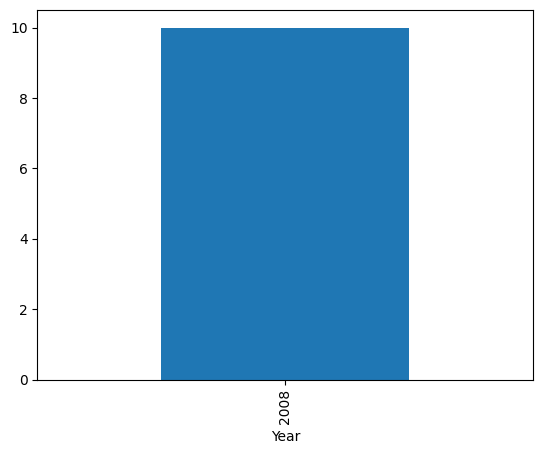

In [25]:
# barchart of age

data['Year'].head(10).value_counts().plot(kind='bar')
plt.show()

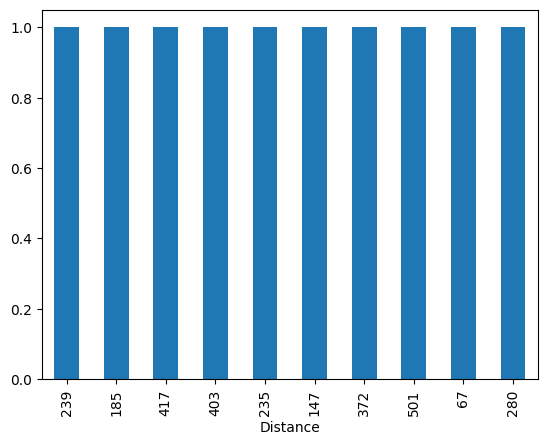

In [26]:
data['Distance'].head(10).value_counts().plot(kind='bar')
plt.show()

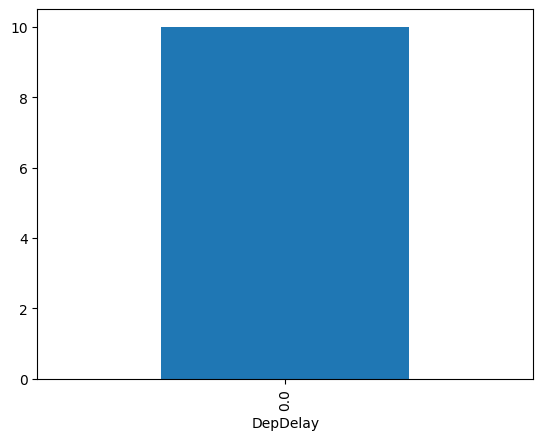

In [30]:
data['DepDelay'].head(10).value_counts().plot(kind='bar')
plt.show()

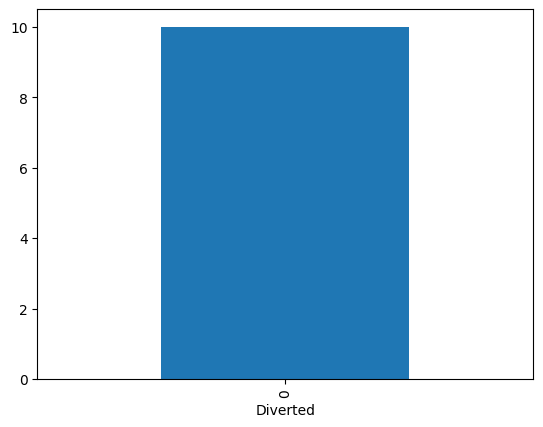

In [29]:
data['Diverted'].head(10).value_counts().plot(kind='bar')
plt.show()

In [31]:
# (a) Check the skewness of Distance travelled by airlines
skewness_distance = data['Distance'].skew()

# (b) Calculate the mean, median and quantiles of the distance travelled by US Airlines (US)
us_airlines_distance = data[data['UniqueCarrier'] == 'US']['Distance']
mean_us = us_airlines_distance.mean()
median_us = us_airlines_distance.median()
quantiles_us = us_airlines_distance.quantile([0.25, 0.5, 0.75])

# (c) Check the standard deviation of distance travelled by American Airlines (AA)
aa_airlines_distance = data[data['UniqueCarrier'] == 'AA']['Distance']
std_dev_aa = aa_airlines_distance.std()

skewness_distance, mean_us, median_us, quantiles_us, std_dev_aa

(1.912697191376648,
 627.3761367770098,
 414.0,
 0.25    280.0
 0.50    414.0
 0.75    728.0
 Name: Distance, dtype: float64,
 502.16995812223286)

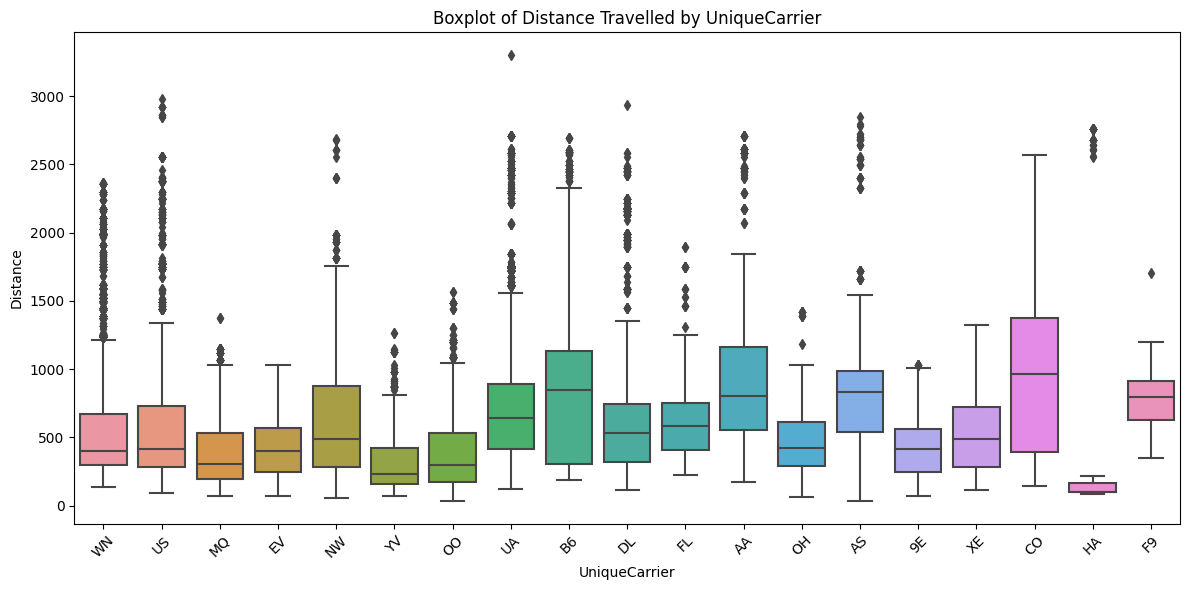

In [27]:
# (d) Draw a boxplot of UniqueCarrier with Distance
plt.figure(figsize=(12, 6))
sns.boxplot(x='UniqueCarrier', y='Distance', data=data)
plt.title('Boxplot of Distance Travelled by UniqueCarrier')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
total_flights = len(data)
wn_flights = len(data[data['UniqueCarrier'] == 'WN'])
aa_flights = len(data[data['UniqueCarrier'] == 'AA'])
wn_or_aa_flights = wn_flights + aa_flights
wn_and_less_600 = len(data[(data['UniqueCarrier'] == 'WN') & (data['Distance'] < 600)])
aa_and_less_2500 = len(data[(data['UniqueCarrier'] == 'AA') & (data['Distance'] < 2500)])
aa_flights_total = len(data[data['UniqueCarrier'] == 'AA'])
cancelled_aa_and_less_2500 = len(data[(data['UniqueCarrier'] == 'AA') & (data['Distance'] < 2500) & (data['Cancelled'] == 1)])

# Calculating probabilities

p_wn = wn_flights / total_flights
p_wn_or_aa = wn_or_aa_flights / total_flights
p_wn_and_less_600 = wn_and_less_600 / total_flights
p_less_2500_given_aa = aa_and_less_2500 / aa_flights_total
p_cancelled_and_less_2500_given_aa = cancelled_aa_and_less_2500 / aa_flights_total

p_wn, p_wn_or_aa, p_wn_and_less_600, p_less_2500_given_aa, p_cancelled_and_less_2500_given_aa


(0.1832, 0.24902, 0.12848, 0.989364934670313, 0.31388635673047705)

* The marginal probability that a flight is operated by "WN" Airlines is approximately 18.32%.
* The probability that a flight is operated by either "WN" or "AA" Airlines is approximately 24.90%.
* The joint probability that a flight is operated by "WN" and travels less than 600 miles is approximately 12.85%.
* The conditional probability that a flight travels less than 2500 miles given that it is operated by "AA" Airlines is approximately 98.94%.
* The joint probability of a flight getting cancelled and is supposed to travel less than 2500 miles, given that the flight is "AA" Airlines, is approximately 31.39%.

In [20]:
from scipy.stats import norm, binom

# (a) Calculate the percentage of "AA" flights expected to lose money on the cashback scheme
prob_over_20 = 1 - norm.cdf(20, loc=15, scale=3)

# (b) Determine the probability that in a sample of 10 flights, 6 are diverted due to bad weather
prob_6_diverted = binom.pmf(6, 10, 0.65)

prob_over_20, prob_6_diverted

(0.047790352272814696, 0.2376684927626953)